In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [46]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda = 'FI' ;"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [47]:
start = datetime(2018,1,1)
ativos

['XPML11.SA', 'XPIN11.SA', 'XPLG11.SA', 'MXRF11.SA']

In [48]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [49]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2020-06-04 to 2021-03-10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XPML11.SA  187 non-null    float64
 1   XPIN11.SA  187 non-null    float64
 2   XPLG11.SA  187 non-null    float64
 3   MXRF11.SA  187 non-null    float64
dtypes: float64(4)
memory usage: 7.3 KB


In [50]:
#Calcula o valor total das acoes na carteira - (cotação do ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    #total += (acoes[key].tail(2)[0].sum() * value)
    total += (acoes[key].tail(1).sum() * value)
    #tambem pode pegar a media do periodo
    #total += (acoes[key].sum() * value)

#cria o array de  peso do ativos contidos na carteira    
# cotação do ativo * quantidade em carteira / total da carteira
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))


# Retorno Simples = PF - PI / PI

In [51]:
#retorno diario dos aivos ( ideal para calculo de várias ações)
returns = acoes / acoes.shift(1) - 1
#returns.head()

In [52]:
#Returno diário da Ambev
#returns["ABEV3.SA"].plot(figsize=(8,5))
#returns["ABEV3.SA"].plot()

In [53]:
#media do retorno diário das acoes 
avg_returns_d = returns.mean()
#avg_returns_d

In [54]:
#Retorno médio anual
avg_returns_a = returns.mean() * 250
#print(str(round(avg_returns_a["ABEV3.SA"] ,5) * 100) + "%")  
print(str(round(avg_returns_a ,5) * 100))  

XPML11.SA   -1.004
XPIN11.SA   -0.933
XPLG11.SA    0.529
MXRF11.SA   -5.642
dtype: float64


# Retorno Logaritmo = log(PF/PI) ou log(PF) - log(PI)

In [55]:
#retorno logaritmo ( ideal para calculo de uma unica ação)
log_returns = np.log(acoes / acoes.shift(1)) 
#log_returns.head()

In [56]:
#media do retorno logaritmo diário das acoes 
avg_log_returns_d = log_returns.mean()
#avg_log_returns_d

In [57]:
#Retorno médio anual
avg_log_returns_a = log_returns.mean() * 250
print(str(round(avg_log_returns_a ,5) * 100))  

XPML11.SA   -2.223
XPIN11.SA   -1.395
XPLG11.SA   -0.898
MXRF11.SA   -6.153
dtype: float64


# Taxa de Retorno do Portfólio
##  retorno = taxa de reotorno de um ativo * peso no portofolio

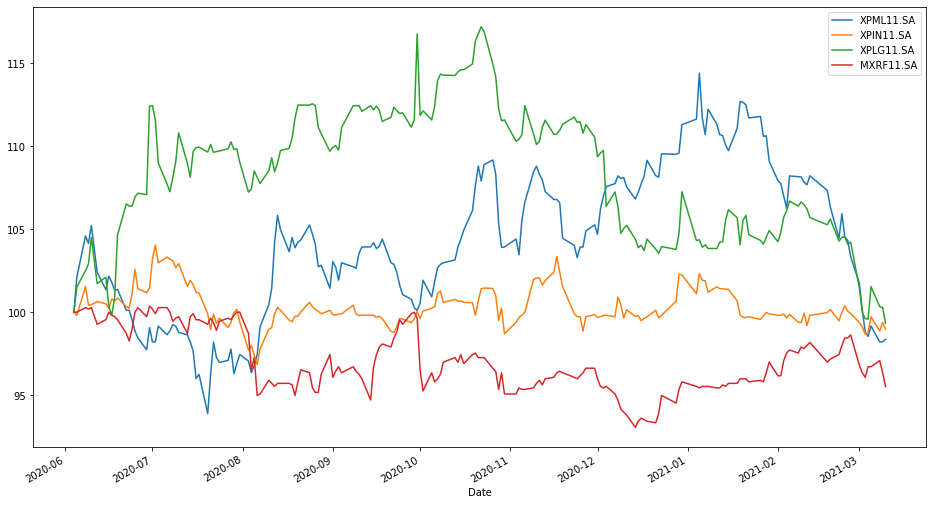

In [58]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [90]:
# neste caso estou colocando valores randomicamente e gerar os  meus pesos
#pode rodar varias vezes e v 
#weights = np.random.random(len(ativos))
weights = pesos # neste caso estou usando o peso da carteira (porcentagem do valor do FII em relação ao total geral da carteira)
weights /= np.sum(weights)
weights


array([0.5309, 0.1467, 0.2955, 0.0269])

In [91]:
portofolio_1 = str(round(np.dot(avg_returns_a, weights),5) *100) + ' %'
print(portofolio_1) 


-0.6649999999999999 %
